# Case Study Analysis: Prediction and Probabilistic Analysis of Flood Occurrence in Kerala

## Introduction

Briefly introduce the problem statement: the challenge of predicting floods using historical rainfall data. Explain the importance of this task for disaster management and mitigation.

## Dataset Description

Dataset Name: "Kerala Flood Dataset"

Features: The dataset consists of historical rainfall data, encompassing key features such as monthly rainfall, annual rainfall, and the binary indicator of flood occurrence.

Size: The dataset's size includes information about the number of instances and features, providing a comprehensive set of data for both model training and evaluation.


In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt


In [2]:
flood=pd.read_csv(r'C:\Users\femif\OneDrive\Documents\Desktop\downloading items\kerala.csv.xls')
flood

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO


In [3]:
# Display the first few rows of the DataFrame
flood.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [4]:
# Display information about the dataset
flood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBDIVISION       118 non-null    object 
 1   YEAR              118 non-null    int64  
 2   JAN               118 non-null    float64
 3   FEB               118 non-null    float64
 4   MAR               118 non-null    float64
 5   APR               118 non-null    float64
 6   MAY               118 non-null    float64
 7   JUN               118 non-null    float64
 8   JUL               118 non-null    float64
 9   AUG               118 non-null    float64
 10  SEP               118 non-null    float64
 11  OCT               118 non-null    float64
 12  NOV               118 non-null    float64
 13  DEC               118 non-null    float64
 14   ANNUAL RAINFALL  118 non-null    float64
 15  FLOODS            118 non-null    object 
dtypes: float64(13), int64(1), object(2)
memory u

In [5]:
# Summary statistics of the numerical columns
flood.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


In [6]:
flood["FLOODS"].unique()

array(['YES', 'NO'], dtype=object)

In [7]:
flood["FLOODS"]=flood["FLOODS"].map({"YES":1,"NO":0})


In [8]:
flood

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,1
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,0
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,0
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,0


# Data preprocessing

In [9]:
#checking row and column
flood.shape

(118, 16)

In [10]:
#checking for null values
flood.isnull().sum()

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

# Exploratory Data Analysis (EDA):

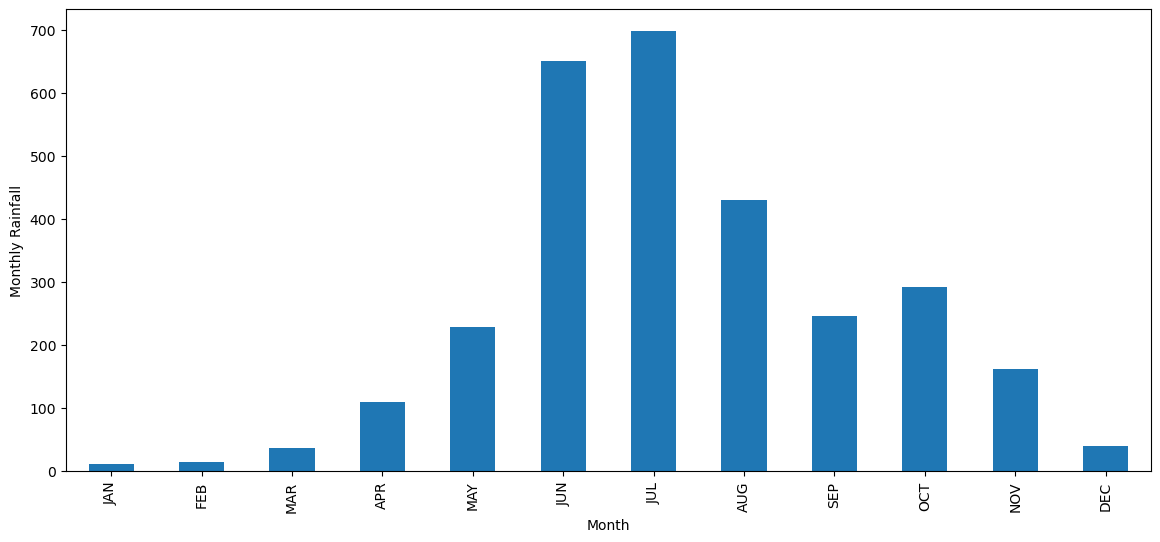

In [11]:
#Visualize monthly and annual rainfall patterns

df= flood[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']].mean().plot.bar(figsize=(14,6))
plt.xlabel('Month')
plt.ylabel('Monthly Rainfall')
plt.show()

In [12]:
#calculate average annual rainfall
annual_avg_rainfall = flood.groupby('YEAR')[' ANNUAL RAINFALL'].mean()
print("Annual Average Rainfall:")
print(annual_avg_rainfall)

Annual Average Rainfall:
YEAR
1901    3248.6
1902    3326.6
1903    3271.2
1904    3129.7
1905    2741.6
         ...  
2014    3046.4
2015    2600.6
2016    2176.6
2017    2117.1
2018    4473.0
Name:  ANNUAL RAINFALL, Length: 118, dtype: float64


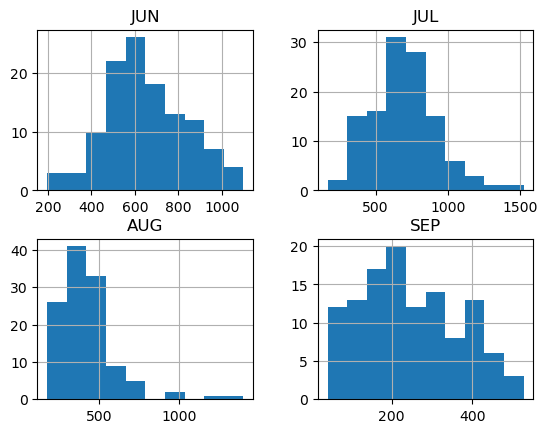

In [13]:

df = flood[['JUN','JUL','AUG','SEP']]
df.hist()
plt.show()


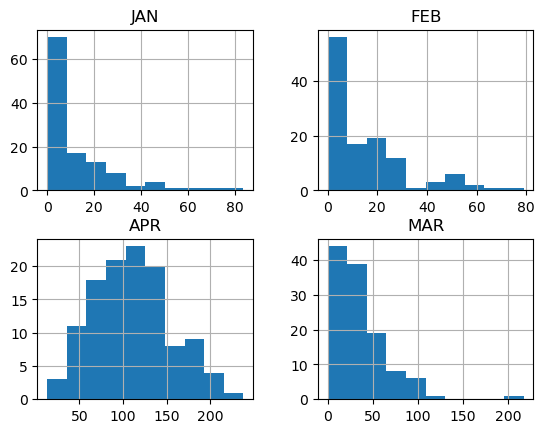

In [14]:
df = flood[['JAN','FEB','APR','MAR']]
df.hist()
plt.show()


C:\Users\femif\AppData\Local\Temp\ipykernel_13508\2432427313.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=flood, x='YEAR', y=' ANNUAL RAINFALL', estimator='sum', ci=None)


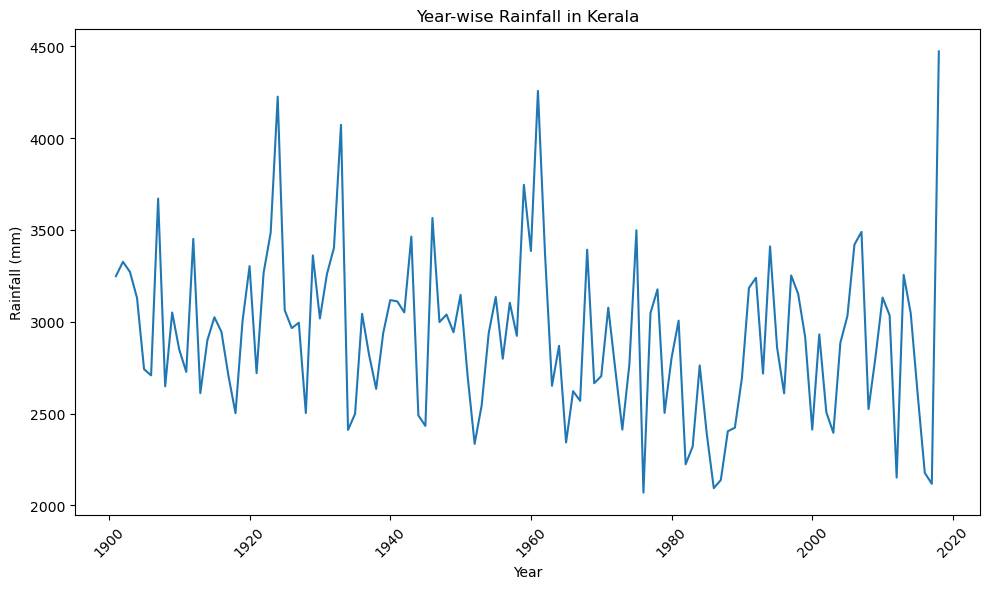

In [15]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=flood, x='YEAR', y=' ANNUAL RAINFALL', estimator='sum', ci=None)
plt.title('Year-wise Rainfall in Kerala')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

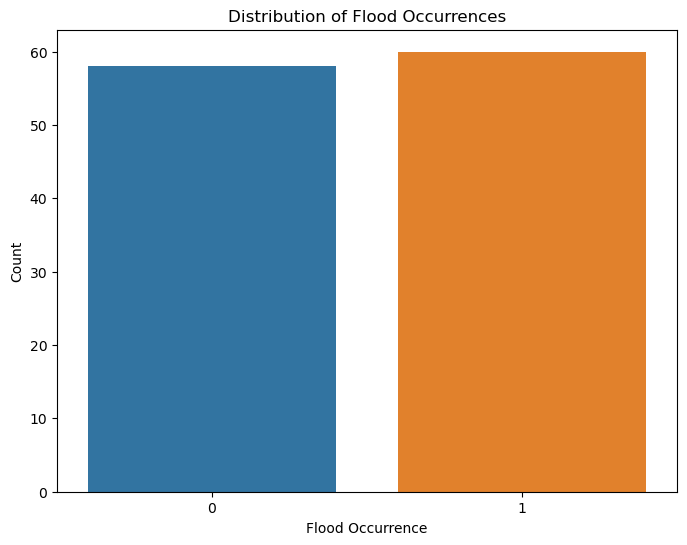

In [16]:
#Distribution of flood occurance
plt.figure(figsize=(8, 6))
sns.countplot(x='FLOODS', data=flood)
plt.title('Distribution of Flood Occurrences')
plt.xlabel('Flood Occurrence')#0 :no flood 1 :yes
plt.ylabel('Count')
plt.show()

In [17]:
correlation_flood_rainfall = flood['FLOODS'].corr(flood[' ANNUAL RAINFALL'])

# Display the correlation coefficient
print("Correlation between 'flood' and 'rainfall':", correlation_flood_rainfall)

Correlation between 'flood' and 'rainfall': 0.776231147112204


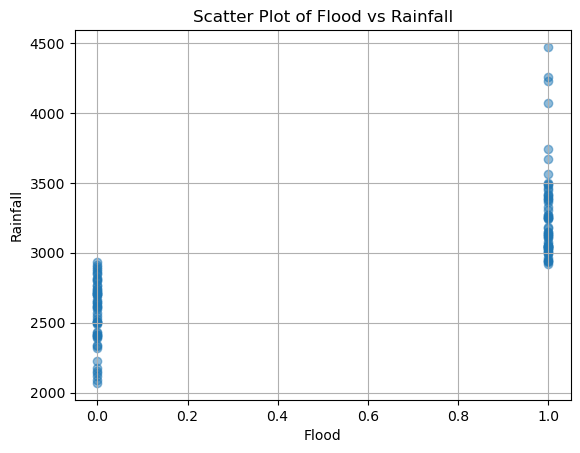

In [18]:

# Plot a scatter plot between "flood" and "rainfall"
plt.scatter(flood['FLOODS'], flood[' ANNUAL RAINFALL'], alpha=0.5)
plt.title('Scatter Plot of Flood vs Rainfall')
plt.xlabel('Flood')
plt.ylabel('Rainfall')
plt.grid(True)
plt.show()

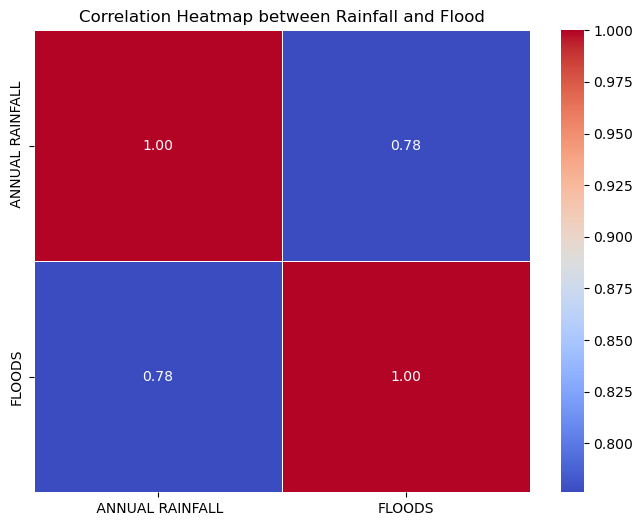

In [19]:
correlation_matrix = flood[[' ANNUAL RAINFALL', 'FLOODS']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap between Rainfall and Flood')
plt.show()

# Model Development

In [20]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [21]:
categorical_cols = flood.select_dtypes(include=['object']).columns
flood_encoded = pd.get_dummies(flood, columns=categorical_cols)


In [22]:
flood_encoded 

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS,SUBDIVISION_KERALA,SUBDIVISION_KERALA
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1,1,0
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1,1,0
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1,1,0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1,1,0
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,1,1,0
114,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,0,1,0
115,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,0,1,0
116,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,0,0,1


In [23]:
X = flood_encoded.drop('FLOODS', axis=1)  # Features (independent variables)
y = flood_encoded['FLOODS']  

In [24]:
#spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
#Model selection and training
model = LogisticRegression()

In [26]:
model.fit(X_train, y_train)

C:\Users\femif\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
y_pred = model.predict(X_test)
y_pred 

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1], dtype=int64)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        14

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



# Random model

In [30]:
X = flood_encoded.drop('FLOODS', axis=1)  # Features (independent variables)
y = flood_encoded['FLOODS']  

In [31]:
X_trainX, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)


In [33]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
y_pred = model.predict(X_test)
y_pred 

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1], dtype=int64)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

# probability

In [36]:
flood_kerala=flood[["YEAR","JUN","JUL","FLOODS"]]
flood_kerala

,YEAR,JUN,JUL,FLOODS
0,1901,824.6,743.0,1
1,1902,390.9,1205.0,1
2,1903,558.6,1022.5,1
3,1904,1098.2,725.5,1
4,1905,850.2,520.5,0
...,...,...,...,...
113,2014,454.4,677.8,1
114,2015,563.6,406.0,0
115,2016,522.2,412.3,0
116,2017,498.5,319.6,0


In [37]:
flood_kerala["JUN"]

0       824.6
1       390.9
2       558.6
3      1098.2
4       850.2
        ...  
113     454.4
114     563.6
115     522.2
116     498.5
117     625.4
Name: JUN, Length: 118, dtype: float64

In [38]:
flood_kerala["JUN_GT_500"]=(flood_kerala["JUN"]>500).astype("int")
flood_kerala["JUL_GT_500"]=(flood_kerala["JUL"]>500).astype("int")

C:\Users\femif\AppData\Local\Temp\ipykernel_13508\1459710250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flood_kerala["JUN_GT_500"]=(flood_kerala["JUN"]>500).astype("int")
C:\Users\femif\AppData\Local\Temp\ipykernel_13508\1459710250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flood_kerala["JUL_GT_500"]=(flood_kerala["JUL"]>500).astype("int")


In [39]:
df_small = flood_kerala.loc[:,['YEAR','JUN_GT_500','JUL_GT_500','FLOODS']]
df_small

,YEAR,JUN_GT_500,JUL_GT_500,FLOODS
0,1901,1,1,1
1,1902,0,1,1
2,1903,1,1,1
3,1904,1,1,1
4,1905,1,1,0
...,...,...,...,...
113,2014,0,1,1
114,2015,1,0,0
115,2016,1,0,0
116,2017,0,0,0


In [40]:
pd.crosstab(df_small["JUN_GT_500"],df_small["FLOODS"],margins=True)

FLOODS,0,1,All
JUN_GT_500,,,
0,19,6,25
1,39,54,93
All,58,60,118


In [41]:
60/118
#P(A)

0.5084745762711864

In [42]:
93/118
#P(B)

0.788135593220339

In [43]:
54/118
#P(AnB)

0.4576271186440678

In [44]:
0.4576271186440678/0.788135593220339

0.5806451612903226

CHANCES FOR GETTING A FLOOD IF THE RAINFALL IS GREATER THAN 500 IS 58%

In [45]:
pd.crosstab(df_small["JUL_GT_500"],df_small["FLOODS"],margins=True)

FLOODS,0,1,All
JUL_GT_500,,,
0,19,3,22
1,39,57,96
All,58,60,118


In [46]:
60/118
#P(A)=60/118

0.5084745762711864

In [47]:
96/118
#p(B)

0.8135593220338984

In [48]:
57/118
#P(AnB)

0.4830508474576271

In [49]:
0.4830508474576271/0.8135593220338984
#P(A|B)=0.4830508474576271/0.8135593220338984

0.59375

CHANCES FOR GETTING A FLOOD IF THE RAINFALL IS GREATER THAN 500 IS 58%

P(A) = Probability of Flooding

P(B) = Probaility of having more than 500 mm rain in JuLY

p(AnB) = Probabiity of flooding and having more than 500mm rain in JuLY

P(A|B) = Probabiity of flooding given it rained more than 500 mm in JuLY

### Strength and Weakness

Logistic Regression:
    
Strengths:

Simplicity and interpretability.

Fast training and prediction.

Weaknesses:

Limited ability to capture complex relationships in the data.

#### Suggest potential areas for future research or improvements.

Comparative Analysis: Compare the coefficients of rainfall variables with coefficients of other predictors in the logistic regression model. If the coefficient of rainfall variables is relatively large compared to other predictors, it suggests that rainfall is an important factor in predicting floods.

Model Performance: Evaluate the overall performance of the logistic regression model in predicting floods. If the model performs well and includes rainfall variables, it suggests that rainfall is an important predictor of floods in the context of the model.

# Conlusion
This analysis aims to select a prediction model for rainfall forecasting. Since Kerala contributes a high amount of agricultural products in India, maximizing the outputs and minimizing the risks of confronting natural disasters are the concern of this analysis.

We can see that the baseline model gave us an Accuracy of 94%, not disappointing but after tuning the model with the hyperparameters we were able to achieve 97% Accuracy over out model,

Hence, we can consider this model to predict the rainfall in the state of Kerala.